<a href="https://colab.research.google.com/github/PQHSGS/ML-DL/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
np.random.seed(11)

In [ ]:
K = 5
N = 500
DOT_AREA=15
cov = [[1, 0], [0, 1]]
colors=np.random.rand(K,3)
means=[]
datas=[]
original_labels=[]
for i in range(K):
    means.append(np.random.randint(1,10,size=2,dtype=int))
    data=np.random.multivariate_normal(means[i], cov, N)
    datas.append(data)
    original_label = np.full(N, fill_value=i)  # Tạo nhãn ban đầu cho mỗi nhóm
    original_labels.append(original_label)
X=np.concatenate(datas, axis=0)
original_labels=np.array(original_labels)
original_labels=np.reshape(original_labels,(1,N*K))
print(means)



[array([3, 8]), array([7, 5]), array([2, 8]), array([4, 8]), array([6, 8])]


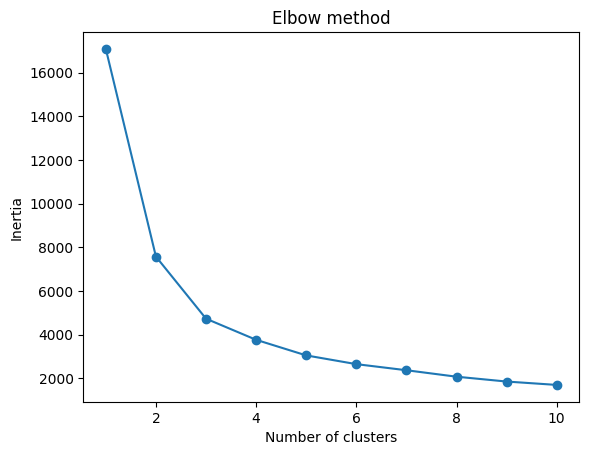

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2,n_init='auto')
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(range(1,11), sse, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

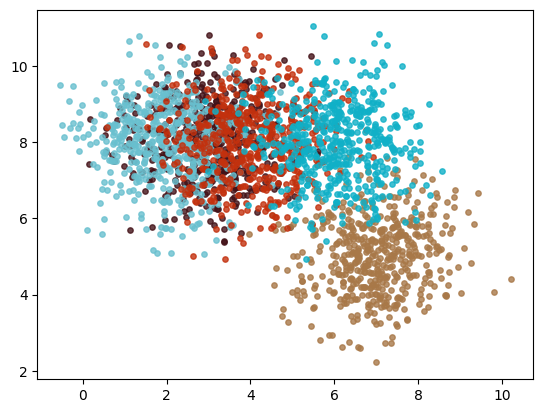

In [ ]:
def kmeans_display(X, label):
    K = np.max(label) + 1
    for i in range(K):
        X0=X[label==i,:]
        plt.scatter(X0[:,0],X0[:,1], s=DOT_AREA,color=colors[i],alpha=0.8)

kmeans_display(X, original_labels.flatten())

Centers found by scikit-learn:
[[6.54391614 6.40889949]
 [2.94380432 8.08399085]]
[array([3, 8]), array([7, 5]), array([2, 8]), array([4, 8]), array([6, 8])]


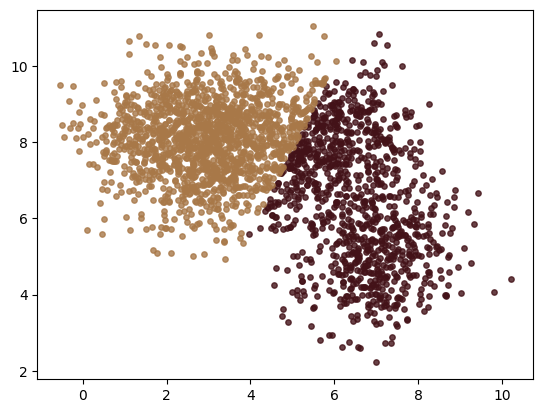

In [ ]:
num_clusters=3
kmeans = KMeans(n_clusters=num_clusters, random_state=0,n_init='auto').fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
print(means)
pred_label = kmeans.fit_predict(X)
kmeans_display(X, pred_label)

In [ ]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) ==
        set([tuple(a) for a in new_centers]))

In [ ]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[1.57654563 8.18559259]
 [7.01413534 5.0172568 ]
 [3.58085214 8.78827017]
 [6.03310079 8.06723351]
 [3.39727196 6.9250223 ]]
[array([3, 8]), array([7, 5]), array([2, 8]), array([4, 8]), array([6, 8])]
iterations: 19


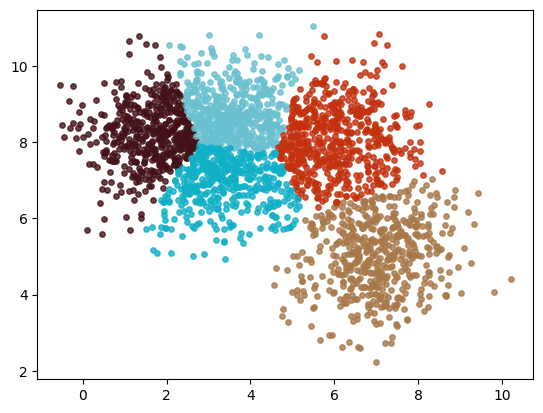

In [ ]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
print(means)
print('iterations:', it)
kmeans_display(X, labels[-1])